# Dynamic Programming Algo For TSP

<img src="./img/tsp.png" style="width: 500px" align="left">

In [115]:
from typing import Optional


class Graph:
    def __init__(self, fname: Optional[str] = None, dist_precalc: Optional[bool] = True):
        self.n = 0
        self.P = []
        self.dist_precalculated = False
        if fname:
            self.read_file(fname)
            if dist_precalc:
                self.dist_precalc()
    
    def calc_dist_2(self, i: int, j: int) -> float:
        x1_x2 = self.P[i][0] - self.P[j][0]
        y1_y2 = self.P[i][1] - self.P[j][1]
        return x1_x2 * x1_x2 + y1_y2 * y1_y2
    
    def calc_dist(self, i: int, j: int) -> float:
        return self.calc_dist_2(i, j) ** 0.5
    
    def dist_precalc(self):
        self.dist_precalculated = True
        self.dist = [[0] * self.n for _ in range(self.n)]
        self._dist = [0] * (self.n * self.n)
        for i in range(self.n):
            for j in range(self.n):
                self.dist[i][j] = self.calc_dist(i, j)
                self._dist[i * self.n + j] = self.calc_dist(i, j)
    
    def read_file(self, fname: str):
        with open(fname) as f:
            self.n = int(f.readline()[:-1])
            while line := f.readline():
                self.P.append(tuple(map(float, line.split())))
            assert len(self.P) == self.n
   
    def tsp_rec(self) -> int:
        self.A = [[float('inf')] + [None] * (self.n - 1) for _ in range(1 << self.n)]
        self.A[1 << (self.n - 1)][0] = 0
        def rec_calc(S: int, j: int):
            _S = list(bin(S)[2:])
            _S = ['0'] * (self.n - len(_S)) + _S
            if self.A[S][j] is not None: return self.A[S][j]
            _S[j] = '0'
            S_j = int(''.join(_S), 2)
            self.A[S][j] = float('inf')
            for k in range(self.n):
                if _S[k] == '1':
                    self.A[S][j] = min(self.A[S][j], rec_calc(S_j, k) + self.dist[k][j])
            return self.A[S][j]
        self.min_tsp = float('inf')
        S = int('1' * self.n, 2)
        for j in range(1, self.n):
            self.min_tsp = min(self.min_tsp, rec_calc(S, j) + self.dist[j][0])
        return self.min_tsp
    
    def tsp_rec_bit_version(self) -> int:
        self.A = [[float('inf')] + [None] * (self.n - 1) for _ in range(1 << self.n)]
        self.A[1 << (self.n - 1)][0] = 0
        self.max_p = 1 << (self.n - 1)
        self.max_p_l = [0] * self.n
        for j in range(self.n):
            self.max_p_l[j] = self.max_p >> j
        def rec_calc(S: int, j:  int):
            S_j = (S ^ self.max_p_l[j])
            self.A[S][j] = float('inf')
            for k in range(self.n):
                if (S_j & self.max_p_l[k]):
                    if self.A[S_j][k] is not None:
                        self.A[S][j] = min(self.A[S][j], self.A[S_j][k] + self.dist[k][j])
                        
                    else:
                        self.A[S][j] = min(self.A[S][j], rec_calc(S_j, k) + self.dist[k][j])
            return self.A[S][j]
        self.min_tsp = float('inf')
        S = int('1' * self.n, 2)
        for j in range(1, self.n):
            self.min_tsp = min(self.min_tsp, rec_calc(S, j) + self.dist[j][0])
        return self.min_tsp
   
test_ans = {
    1: 10.24,
    2: 12.36,
    3: 14.00
}
for test_idx in [1, 2, 3]:
    g = Graph(f'./tests/tsp{test_idx}.txt')
    algo_ans = round(g.tsp_rec_bit_version(), 2)
    print(f'test_idx={test_idx}, TSP={algo_ans}, {test_ans[test_idx] == algo_ans}')

test_idx=1, TSP=10.24, True
test_idx=2, TSP=12.36, True
test_idx=3, TSP=14.0, True


In [112]:
%%timeit
g = Graph(f'./tests/tsp3.txt')
algo_ans = round(g.tsp_rec(), 2)

110 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [116]:
%%timeit
g = Graph(f'./tests/tsp3.txt')
algo_ans = round(g.tsp_rec_bit_version(), 2)

93.8 µs ± 3.66 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


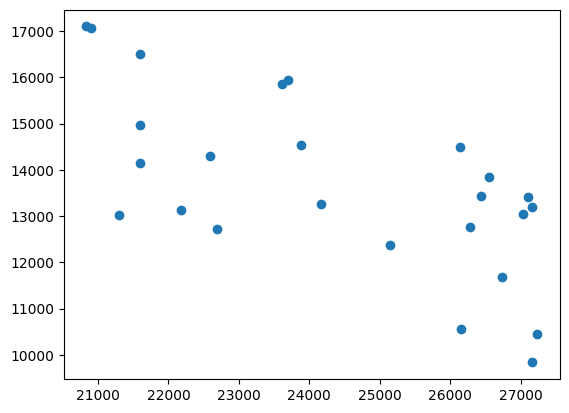

In [73]:
import matplotlib.pyplot as plt
import numpy as np


g = Graph(f'./tests/tsp.txt')
points = np.array(g.P)
plt.scatter(points[:, 0], points[:, 1])
plt.show()

Is it a good idea to combine several points, for instance two upper left?